In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<h1 align="center"> Yard et al. Replication </h1>
<h4 align="center"> Christine Zhang </h4>

---

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import random
import seaborn as sns
from scipy import stats 
from sklearn.linear_model import LinearRegression as Lin_Reg

### Figure 1c

---

In [6]:
dataset1_pd = pd.read_csv('datasets/dataset1.csv', skiprows = [0,1], sep =",", 
                          names = ["Cclid", "Cellline", "Sites", "Histology", "Subhistology", "Culture", "SNP", "AUC"])
dataset1 = dataset1_pd.as_matrix()
dataset1_pd.head(n=10)

,Cclid,Cellline,Sites,Histology,Subhistology,Culture,SNP,AUC
0,3,5637,urinary_tract,carcinoma,NS,RPMI001,SNP-matched-reference,2.473
1,7,22RV1,prostate,carcinoma,NS,RPMI001,SNP-matched-reference,2.142
2,10,42MGBA,central_nervous_system,glioma,astrocytoma_Grade_IV,RPMIMEM001,SNP-matched-reference,3.380
3,15,647V,urinary_tract,carcinoma,transitional_cell_carcinoma,DMEM011,SNP-matched-reference,3.374
4,16,769P,kidney,carcinoma,clear_cell_renal_cell_carcinoma,RPMI001,SNP-matched-reference,3.123
5,19,786O,kidney,carcinoma,clear_cell_renal_cell_carcinoma,RPMI001,SNP-matched-reference,3.779
6,21,8505C,thyroid,carcinoma,anaplastic_carcinoma,EMEM001,SNP-matched-reference,3.471
7,22,8MGBA,central_nervous_system,glioma,astrocytoma_Grade_IV,EMEM005,SNP-matched-reference,2.625
8,23,A101D,skin,malignant_melanoma,NS,DMEM001,SNP-matched-reference,4.677
9,25,A172,central_nervous_system,glioma,astrocytoma_Grade_IV,DMEM001,SNP-matched-reference,2.751


In [7]:
CL_all, CL_avg, hist_all, hist_avg, subhist_all, subhist_avg = [], [], [], [], [], []

def yardfig (all_lst, avg_lst, type_num): 
    
    sites_lst = list(set(dataset1[:, type_num]))
    
    # list of identifiers
    for index in range(0,len(sites_lst)):
        per_site = dataset1[dataset1[:, type_num] == sites_lst[index]]
        avg_lst.append([sites_lst[index], np.mean(per_site[:,-1])])   

    # sort list of identifiers
    avg_lst_np = np.array(avg_lst)
    avg_lst_sorted = avg_lst_np[avg_lst_np[:,1].argsort()][::-1]
    sites_lst_sorted = [i for [i,j] in avg_lst_sorted]

    # integral survival by identifier
    for index in range(0, len(sites_lst_sorted)):
        per_site = dataset1[dataset1[:, type_num] == sites_lst_sorted[index]]
        for index_inner in range(0, len(per_site)):
            all_lst.append([sites_lst_sorted[index], per_site[index_inner][-1]])

    return all_lst, avg_lst_sorted

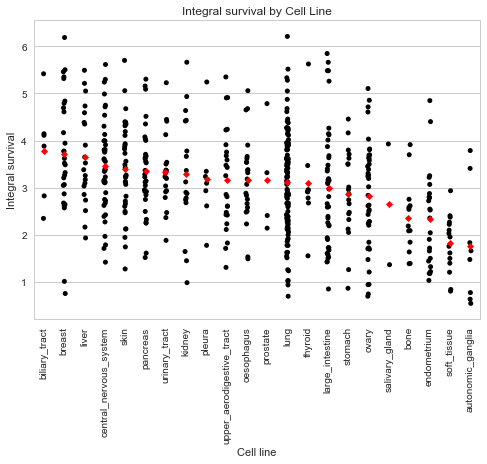

In [8]:
CL_all_full, CL_avg_sorted_full = yardfig(CL_all, CL_avg, 2)

def plot_auc (all_lst, avg_lst):
    x = [sites for [sites,auc] in all_lst]
    y = [auc for [sites,auc] in all_lst]
    w = [sites for [sites,auc] in avg_lst]
    z = [auc for [sites,auc] in avg_lst]
    sns.set(style="whitegrid", palette="muted")
    fig1c = sns.stripplot(x, y, jitter = 0.05, color = "black")
    fig1c = sns.stripplot(w, z, jitter = 0.05, color = "red", marker="D")
    plt.xticks(rotation=90)
    plt.ylabel("Integral survival")
    return fig1c

fig1c = plot_auc(CL_all_full, CL_avg_sorted_full)
plt.title("Integral survival by Cell Line")
plt.xlabel("Cell line")
plt.show()

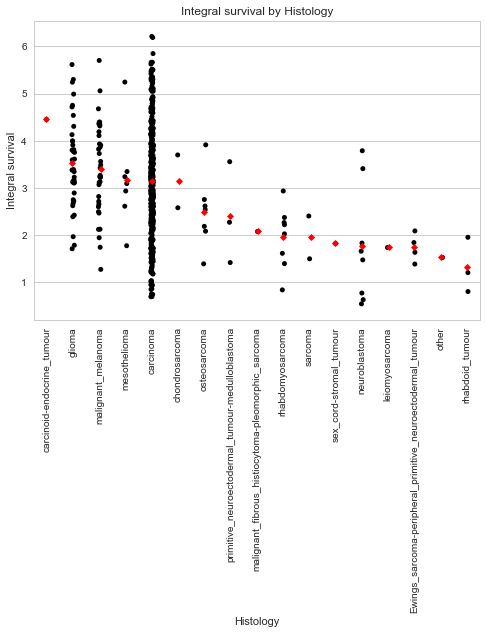

In [9]:
hist_all_full, hist_avg_sorted_full = yardfig(hist_all, hist_avg, 3)

fig2a = plot_auc(hist_all_full, hist_avg_sorted_full)
plt.title("Integral survival by Histology")
plt.xlabel("Histology")
plt.show()

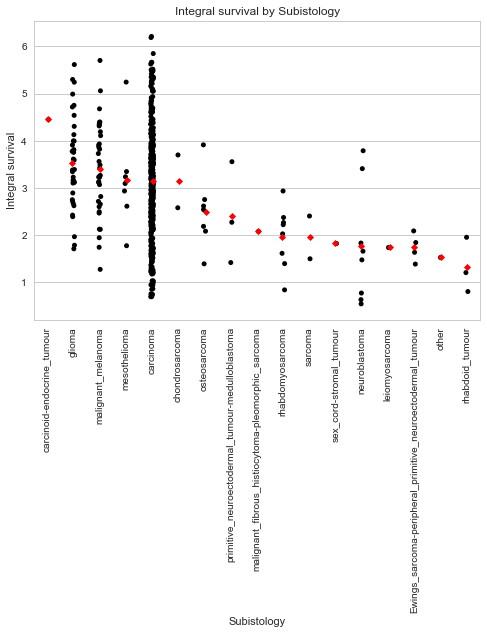

In [10]:
subhist_all_full, subhist_avg_sorted_full = yardfig(subhist_all, subhist_avg, 4)

fig2a = plot_auc(hist_all_full, hist_avg_sorted_full)
plt.title("Integral survival by Subistology")
plt.xlabel("Subistology")
plt.show()

### Figure 2a

---

In [11]:
dataset3_pd = pd.read_csv('datasets/dataset3.csv', skiprows = [0,1], sep =",", 
                          names = ["Cellline", "fSCNA", "mutationnum", "log2mutation", "AUC"])
dataset3 = dataset3_pd.as_matrix()
dataset3_pd.head(n=10)

,Cellline,fSCNA,mutationnum,log2mutation,AUC
0,5637,0.459,65.0,6.022367813,2.473
1,22RV1,0.198,259.0,8.016808288,2.142
2,42MGBA,0.658,18.0,4.169925001,3.380
3,647V,0.862,65.0,6.022367813,3.374
4,769P,0.180,19.0,4.247927513,3.123
5,786O,0.440,39.0,5.285402219,3.779
6,8505C,0.596,29.0,4.857980995,3.471
7,8MGBA,0.298,23.0,4.523561956,2.625
8,A101D,0.756,23.0,4.523561956,4.677
9,A172,0.667,48.0,5.584962501,2.751


In [12]:
fSCNA_lst = [[fSCNA, AUC] for [cellline, fSCNA, mutnum, logmut, AUC] in dataset3 if fSCNA != "#NUM!"]

# clean log2mutation column type
dataset3_pd_clean = dataset3_pd.iloc[:, 3:5].dropna()
dataset3_clean = dataset3_pd_clean.as_matrix()
mut_lst = [[np.float(logmut), AUC] for [logmut, AUC] in dataset3_clean if logmut != "#NUM!"]

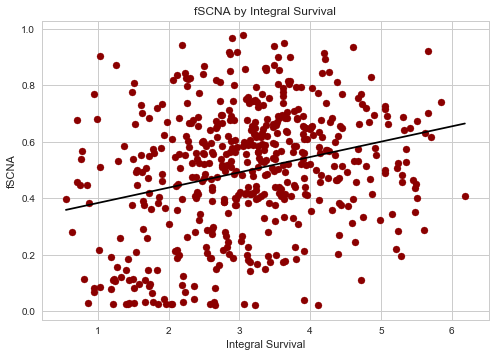

In [13]:
fSCNA_lst_np = np.array(fSCNA_lst)
fSCNA_lst_np_clean = fSCNA_lst_np[~np.isnan(fSCNA_lst_np).any(axis=1)]
fSCNA_x = [auc for [fSCNA, auc] in fSCNA_lst_np_clean]
fSCNA_y = [fSCNA for [fSCNA, auc] in fSCNA_lst_np_clean]

# linear regression
def linreg (x_val, y_val):
    slope, intercept, r_val, p_val, stddev = stats.linregress(x_val, y_val)
    lin_space = np.linspace(np.min(x_val), np.max(x_val), 500)
    reg_y = [slope * val + intercept for val in lin_space]
    linreg_plt = plt.plot(lin_space, reg_y, color = "black")
    return linreg_plt

linreg_plt = linreg(fSCNA_x, fSCNA_y)
plt.scatter(fSCNA_x, fSCNA_y, color = "darkred")
plt.title("fSCNA by Integral Survival")
plt.xlabel("Integral Survival")
plt.ylabel("fSCNA")
plt.show()

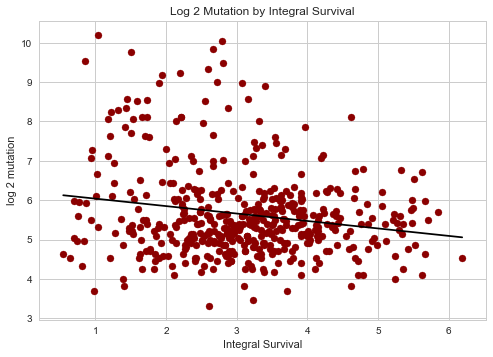

In [14]:
mut_x = [auc for [mut, auc] in mut_lst]
mut_y = [mut for [mut, auc] in mut_lst]

linreg_plt = linreg(mut_x, mut_y)
plt.scatter(mut_x, mut_y, color = "darkred")
plt.title("Log 2 Mutation by Integral Survival")
plt.xlabel("Integral Survival")
plt.ylabel("log 2 mutation")
plt.show()